# Newton-Raphson for $f$.

## I am going to use Newton-Raphson's method to solve Kepler's equation in order to find the true anomaly, $f$. This time, the true anomaly, $f$ will have a different value for each value of the time vector. 

## Kepler's equaiton is the following:
$$ M = E -esin(E) $$

## In order to solve it, it is useful to write it in the following form:
$$g(E) = E -esinE -M $$

## The true anomaly, $f$, can be obtained with the following equation:
$$ f = 2 arctan[\sqrt{\frac{1+e}{1-e}} tan(\frac{E}{2})]$$

The number of elements of the time vector is: 2000
The number of elements of the E0 vector is: 2000
The number of elements of the f vector is: 2000
The number of elements of the vr vector is: 2000
0.3


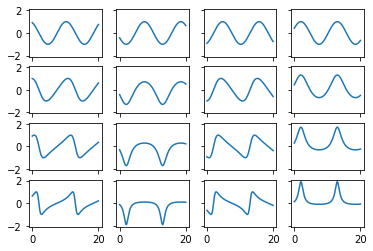

In [80]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Define a function for the Eccentric anomaly in Kepler's Equation. E is function of M
#which at the same time is function of t.
def g_E(t,params):
    M  = params[0]
    e  = params[1]
    E  = params[2]
    t0 = params[3]
    T  = params[4]
    g = E - e*np.sin(E) - M
    return g

#Now I define its derivative
def Dif_g(t,params):
    #M  = params[0]
    e  = params[1]
    E  = params[2]
    t0 = params[3]
    T  = params[4]
    Dg = 1 - e*np.cos(E)
    return Dg

#Now I define the time vector, give the value of t0 and other needed parameters
t = np.arange(0,20,0.01)
t0 = 13#days
T = 11 #days
M = 2*np.pi*(t-t0)/T 
e = 0
E0 = M
error = 10
i = 1

print('The number of elements of the time vector is:',len(t))

#Now I will create a function that solves Kepler's equation with Newton-Raphson:
def E_NR(E0,E1):
    while error > 1e-10 :
    #This line is the quid of Newton-Raphson's method
        E1 = E0 - g_E(t, [M,e,E0,t0,T])/Dif_g(t,[M,e,E0,t0,T])
    #This line computes the error between the old and new apporximated roots
        error = np.abs(E1-E0)
    #This line re-wrties the value of the old approximation in order to do the iterations
        E0 = E1
        i = i + 1
    #This line returns E0 as a vector with the same number of elements of the time vector 
    #(i.e.20/0.01 = 2000 elements)
        return E0

print('The number of elements of the E0 vector is:',len(E0))

#Now It is time to calculate the true anomaly since I already have M and E.
#I have to obtain a f vector with the same elements of the time vector
#So I have to iterate that number of times in order to obtain the f vector
for iteration in range(0,2000):
    #I write down the expression for f using np.arctan2
    f = 2*np.arctan2(np.sqrt((1+e)/(1-e))*np.tan(E0/2), 1)
    #At the end of this for, the vector f has the same number of elements of the time vector
    #(i.e. 2000 elemenst)
print('The number of elements of the f vector is:',len(f))
    
#Now I write a function that will compute the RV
def calcula_RV(t,parametros):
    vz = parametros[0]
    K  = parametros[1]
    w  = parametros[2]
    vr = vz + K*(np.cos(w)*np.cos(f) - np.sin(w)*np.sin(f) + e*np.cos(w))
    #This line return vr as a vector with the same number of elements of the time vector
    #(i.e 20/0.01=2000 elements)
    return vr
print('The number of elements of the vr vector is:',len(vr))

#Now I give some values for the RV plot
vz = 0 #km/s
K  = 1 #km/s
w  = np.pi/2  #radians

#### I THINK THAT THE FOLLOWING PART OF THE CODE CAN BE IMPROVED DRASTICALLY   ###
#### I DIDN'T USE THE FUNCTION gridspec AT ALL, SO I HAVE TO LEARN ABOUT THAT! ###

#Now I call the function that computes the radial velocity for the first plot
vr = calcula_RV(t, [vz,K,w])

#I WILL CREATE THE FUNCTIONS THAT WILL BE PLOTED IN THE FOLLOWIN ORDER#
#IT WILL BE A 4X4 ARRAY OF SUBPLOTS

#Now for the (1,2) plot I have to change omega
w=np.pi
vr_12 = calcula_RV(t,[vz,K,w])

#Now for the (1,3) plot I have to change omega
w = 3*np.pi/2
vr_13 = calcula_RV(t,[vz,K,w])

#Now for the (1,4) plot I have to change omega
w = 2*np.pi
vr_14 = calcula_RV(t,[vz,K,w])

#Now for the (2,1) plot. This time the eccentricity is changed.
#So I have to rewrite the for that computes f with the new eccentricity
w = np.pi/2
e = 0.3
for iteration in range(0,2000):
    f = 2*np.arctan2(np.sqrt((1+e)/(1-e))*np.tan(E0/2), 1)
    
vr_21 = calcula_RV(t,[vz,K,w])

#Now for the (2,2)plot
w = np.pi
vr_22 = calcula_RV(t,[vz,K,w])

#Now for the (2,3) plot
w = 3*np.pi/2
vr_23 = calcula_RV(t,[vz,K,w])

#Now for the (2,4) plot
w = 2*np.pi
vr_24 = calcula_RV(t,[vz,K,w])
print(e)

#Now for the (3,1) plot.This time the eccentricity changes.
#So I have to rewrite the for that computes f
e = 0.7
for iteration in range(0,2000):
    f = 2*np.arctan2(np.sqrt((1+e)/(1-e))*np.tan(E0/2), 1)
w = np.pi/2
vr_31 = calcula_RV(t,[vz,K,w])

#Now for the (3,2) plot
w = np.pi
vr_32 = calcula_RV(t,[vz,K,w])

#Now for the (3,3) plot
w = 3*np.pi/2
vr_33 = calcula_RV(t,[vz,K,w])

#Now for the (3,4) plot
w = 2*np.pi
vr_34 = calcula_RV(t,[vz,K,w])

#Now for the (4,1) plot.This time the eccentricity changes.
#So I have to rewrite the for that computes f
e = 0.9
for iteration in range(0,2000):
    M = 2*np.pi*(t-t0)/T
    f = 2*np.arctan2(np.sqrt((1+e)/(1-e))*np.tan(E0/2), 1)
w = np.pi/2
vr_41 = calcula_RV(t,[vz,K,w])

#Now for the (4,2) plot
w = np.pi
vr_42 = calcula_RV(t,[vz,K,w])

#Now for the (4,3) plot
w = 3*np.pi/2
vr_43 = calcula_RV(t,[vz,K,w])

#Now for the (4,4) plot
w = 2*np.pi
vr_44 = calcula_RV(t,[vz,K,w])

#Now I plot all of the above in the following array

#|e=0,  w = pi/2 | e=0,  w = pi | e=0,   w = 3pi/2 | e=0,   w = 2pi|
#|e=0.3,w = pi/2 | e=0.3,w = pi | e=0.3, w = 3pi/2 | e=0.3, w = 2pi|
#|e=0.7,w = pi/2 | e=0.7,w = pi | e=0.7, w = 3pi/2 | e=0.7, w = 2pi|
#|e=0.9,w = pi/2 | e=0.9,w = pi | e=0.9, w = 3pi/2 | e=0.9, w = 2pi|

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
ax[0,0].plot(t,vr) # row1, col 1
ax[1,0].plot(t,vr_21) # row2, col 1
ax[2,0].plot(t,vr_31) # row3, col 1
ax[3,0].plot(t,vr_41) # row4, col 1
ax[0,1].plot(t,vr_12) # row1, col 2
ax[1,1].plot(t,vr_22) # row2, col 2
ax[2,1].plot(t,vr_32) # row3, col 2
ax[3,1].plot(t,vr_42) # row4, col 2
ax[0,2].plot(t,vr_13) # row1, col 3
ax[1,2].plot(t,vr_23) # row2, col 3
ax[2,2].plot(t,vr_33) # row3, col 3
ax[3,2].plot(t,vr_43) # row4, col 3
ax[0,3].plot(t,vr_14) # row1, col 4
ax[1,3].plot(t,vr_24) # row2, col 4
ax[2,3].plot(t,vr_34)# row3, col 4
ax[3,3].plot(t,vr_44)# row4, col 4

## Incredibly, that worked really good! Now it is time to add the Transit part to the code. We need to address a lot of transit equations first in order to make decent plots about transits